# Sensors & Sensing
## Homework Assignment №2
---
## Anton Buguev BS19-RO-01
#### a.buguev@innopolis.university
#### 16 April 2022

## Task1. Case 1

### Read data from text file, where 1st column represents time and 2nd column roll angle of the UAV.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data1 = pd.read_csv("case1.txt", header=None)
data1.columns = ['time', 'angle']

### Plot data

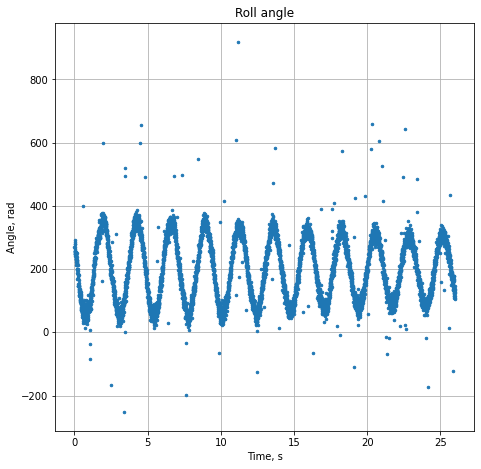

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize=(7.5, 7.5))
time_arr = data1['time']
angle_arr = data1['angle']
ax1.plot(time_arr, angle_arr, '.', markersize=5)
ax1.set_title("Roll angle")
ax1.set_xlabel("Time, s")
ax1.set_ylabel("Angle, rad")
ax1.grid()
plt.show()

### Implement Kalman Filter

Let us use Kalman filter in form
$$y_k = z_{k-1} - \overline{x}_{k-1}$$
$$K = \frac{\overline{P}}{\overline{P}+R}$$
$$x_k = \overline{x}_{k-1}+Ky_k$$
$$P = (1 - K)\overline{P} + Q$$
where 

$z_{k-1}$ - previous value from dataset,

$\overline{x}_{k-1}$ - previous filtered value,

$\overline{P}$ - variance of predicted value which we initially set to 0,

$P$ - updated value of $\overline{P}$,

$R$ - variance of measured value which we approximately set to 1000, because range of the noise is really big

$x_k$ - new filtered valued

$Q$ - initial estimated variance whi we ste to 100

First, let us take consider first 100 points from dataset to tune value of K

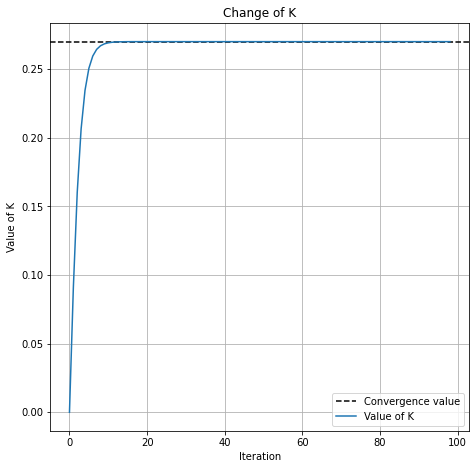

Final value of K = 0.2701562118716424


In [12]:
N = 100
x_opt = [angle_arr[0]]
R = 1000
Q = 100
P = 0
K = 0
K_arr = []

for i in range(1,N):
    y = angle_arr[i-1] - x_opt[i-1]
    K = P / (P + R)
    K_arr.append(K)
    x_opt.append(x_opt[i - 1] + K * y)
    P = (1 - K) * P + Q

fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))
ax.axhline(y=K, color='black', linestyle='--', label='Convergence value')
ax.plot(K_arr, markersize=5, label='Value of K')
ax.legend()
ax.set_title("Change of K")
ax.set_xlabel("Iteration")
ax.set_ylabel("Value of K")
ax.grid()
plt.show()
print(f"Final value of {K = }")

### Filter remaining values using tuned K and formulas and plot result
$$y_k = z_{k-1} - \overline{x}_{k-1}$$
$$x_k = \overline{x}_{k-1}+Ky_k$$

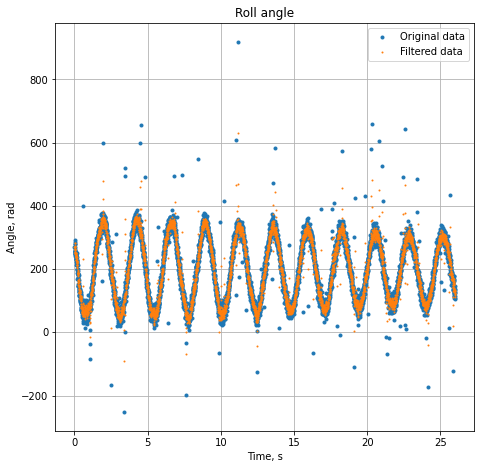

In [11]:
for i in range(N, len(angle_arr)):
    y = angle_arr[i - 1] - x_opt[i - 1]
    x_opt.append(x_opt[i - 1] + K * y)

fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))
time_arr = data1['time']
angle_arr = data1['angle']
ax.plot(time_arr, angle_arr, '.', label='Original data')
ax.plot(time_arr, x_opt, '.', markersize=2, label='Filtered data')
ax.legend()
ax.set_title("Roll angle")
ax.set_xlabel("Time, s")
ax.set_ylabel("Angle, rad")
ax.grid()
plt.show()

### Conclusion
As we can see, the filtered line fits the data prefectly and minimizes the range of the noise.

## Second task is implemented in MATLAB